In [43]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean 

sns.set(font_scale=1.5, style = 'white')
color_scheme = {'Mouse':'#FF9E01',
               'Kymouse':'#000000',
                'Human':'#5695C1'}
row_colors = {'Human':'#1D00FF','Kymouse':'#000000'}
data_dir = 'tables'

In [29]:
## you can do this either with the saab clusters or ablooper clusters :)

In [44]:


def cluster_plot(df, kind='normalised', x_labels = False):
    subset = df.drop('species',axis=1)
    lut = dict(zip(['Human','Kymouse','Mouse'],[color_scheme['Human'],color_scheme['Kymouse'],color_scheme['Mouse']]))
    row_colors = df['species'].map(lut)
    if kind == 'normalised':
        label = 'normalised frequency'
    elif kind == 'binary':
        label = 'presence/absence of template'
        subset = subset.applymap(lambda x:1 if x>0 else 0)
    ax=sns.clustermap(subset,cmap="coolwarm",cbar_kws={'label':label},row_colors=row_colors)
    ax.ax_col_dendrogram.set_visible(False)
    if not x_labels:
        ax.ax_heatmap.set_xticklabels('')
    else:
        for tick in ax.ax_heatmap.get_xticklabels():
            tick.set_rotation(45)
    return ax



/homes/erichard/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 5.5, 'CDRH3 structural cluster')

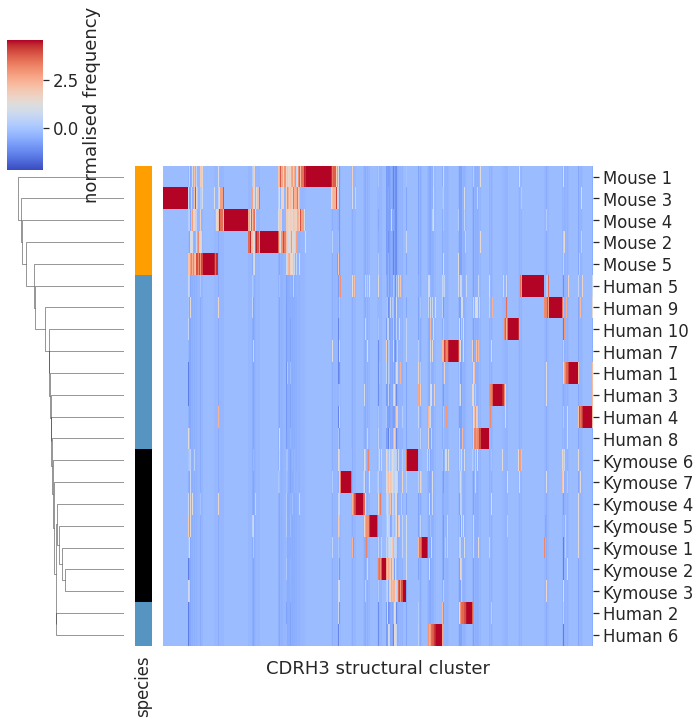

In [54]:
data_dir = f'/data/icarus/not-backed-up/erichard/hummus/github_data/'
usages = pd.read_csv(os.path.join(data_dir,'ablooper_clusters.csv'), index_col = 0)
usages[usages.columns] = StandardScaler().fit_transform(usages)
usages['species'] = usages.index.map(lambda x:x.split()[0])
ax=cluster_plot(usages)
ax.ax_heatmap.set_xlabel('CDRH3 structural cluster')

In [27]:
def interindividualdifferences(df,distance_func=euclidean):
    individual_list = df.index
    out_df = {'individual 1':[],'individual 2':[],'type':[],'overlap':[]}
    individuals = dict(df['species'])
    for x,p in enumerate(individual_list):
        for h in individual_list[x+1:]:
            set_1 = df.drop(columns=['species']).loc[p]
            set_2 = df.drop(columns=['species']).loc[h]
            out_df['individual 1'].append(p)
            out_df['individual 2'].append(h)
            types = '/'.join(sorted([individuals[p],individuals[h]]))
            out_df['type'].append(types)
            distance = distance_func(set_1,set_2)
            out_df['overlap'].append(distance)
    out_df = pd.DataFrame(out_df)
    return out_df

def figure5A(distances, ylabel):

    fig, axs = plt.subplots(1,3,figsize=[10,5],sharey=True)
    ax = axs[0]

    sns.boxplot(data=distances[distances['type'].isin(['Human/Human','Human/Kymouse','Human/Mouse'])],x='type',y='overlap',ax=ax,color=color_scheme['Human'])
    sns.swarmplot(data=distances[distances['type'].isin(['Human/Human','Human/Kymouse','Human/Mouse'])],x='type',y='overlap',alpha=0.5,color='black',ax=ax)
    ylim = ax.get_ylim()[1]
    new_labels = []
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        label = '/\n'.join([p.capitalize() for p in tick.get_text().split('/')])
        new_labels.append(tick.get_text().replace('/','/\n'))
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Type of comparison')
    ax.set_xticklabels(new_labels)
    ax.set_title('Comparisons with human\n repertoires')
   # ax.text(-1,ylim,'A',size=14)
    sns.despine()

    ax = axs[1]
    sns.boxplot(data=distances[distances['type'].isin(['Mouse/Mouse','Human/Mouse','Kymouse/Mouse'])].sort_values('type',ascending=False),x='type',y='overlap',ax=ax,color=color_scheme['Mouse'])
    sns.swarmplot(data=distances[distances['type'].isin(['Mouse/Mouse','Human/Mouse','Kymouse/Mouse'])].sort_values('type',ascending=False),x='type',y='overlap',alpha=0.5,color='black',ax=ax)
    new_labels = []
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        label = '/\n'.join([p.capitalize() for p in tick.get_text().split('/')])
        new_labels.append(label)
    ax.set_ylabel('')
    ax.set_xlabel('Type of comparison')
    ax.set_xticklabels(new_labels)
    ax.set_title('Comparisons with murine\n repertoires')
    sns.despine()

    ax = axs[2]
    sub = distances[distances['type'].isin(['Kymouse/Kymouse','Human/Kymouse','Kymouse/Mouse'])]
    sub['order'] = [0 if k=='Kymouse/Kymouse' else 1 if k == 'Human/Kymouse' else 2 for k in sub['type']]
    sns.boxplot(data=sub.sort_values('order'),x='type',y='overlap',ax=ax,color=color_scheme['Kymouse'],boxprops=dict(alpha=.9))
    sns.swarmplot(data=sub.sort_values('order'),x='type',y='overlap',alpha=0.5,color='black',ax=ax)
    new_labels = []
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        label = '/\n'.join([p.capitalize() for p in tick.get_text().split('/')])
        new_labels.append(label)
    ax.set_ylabel('')
    ax.set_xlabel('Type of comparison')
    ax.set_xticklabels(new_labels)
    plt.title('Comparisons with Kymouse\nrepertoires')

    ylim = ax.get_ylim()[1]
    for p,axis in enumerate(axs):
        axis.text(-1, ylim, 'ABC'[p],size=14)
    sns.despine()

/homes/erichard/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_2874469/255258878.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['order'] = [0 if k=='Kymouse/Kymouse' else 1 if k == 'Human/Kymouse' else 2 for k in sub['type']]
/homes/erichard/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


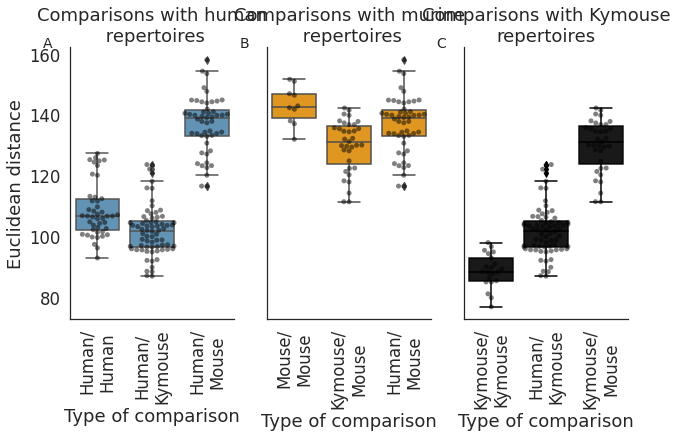

In [52]:
out = interindividualdifferences(usages)
figure5A(out, ylabel = 'Euclidean distance')